**Support Vector Machine (SVM) Model - Cotton Pulps Grades**  

In [1]:
# Importing Required Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Package for Standardizing Data
from sklearn.preprocessing import StandardScaler

# Package for Partitioning Data
from sklearn.model_selection import train_test_split

# Package for SVM Model
from sklearn.svm import SVC


# Packages for Model Accuracy Evaluation 
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Loading Dataset to a pandas Dataframe
CottonPulps_data = pd.read_csv('Cotton Pulps_Factors.csv')

In [3]:
# Getting Dataset Shape
CottonPulps_data.shape

(500, 21)

In [4]:
# Count Number of Records for each Grade 
CottonPulps_data['Final Grade Letter'].value_counts()

Final Grade Letter
B    267
A    183
C     50
Name: count, dtype: int64

<Axes: xlabel='Final Grade Letter', ylabel='count'>

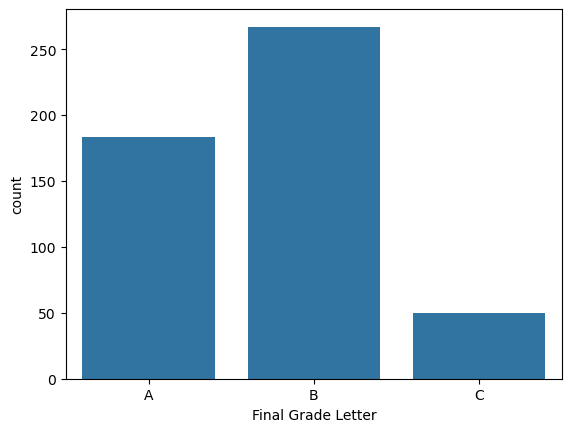

In [5]:
# Visulaizing number of Records for each Class
sns.countplot(x="Final Grade Letter" , data = CottonPulps_data)

In [6]:
# Drop Unnecessary Columns
CottonPulps_data = CottonPulps_data.iloc[:, 3:].dropna(axis=0)

In [7]:
# Define Predictors (Features)
CottonPulps_data_X = CottonPulps_data.drop(columns=['Final Grade','Final Grade Letter'], axis=1)

### Converting Categorical Variables to Numerical Variables

1) Ginning Methods: 
   For all Records are Automated ---> So, no Dummy Variable is defined for it
   
   
2) Packing Method: 

   Bails --> 0 
   Rolls --> 1

In [14]:
# Define Dummy Variables for Categorical Variables 
CottonPulps_data_X = pd.get_dummies(CottonPulps_data_X,prefix_sep='_', drop_first=True)
CottonPulps_data_X = CottonPulps_data_X.astype(int)

In [15]:
# Separating Features and Target
X = CottonPulps_data_X
Y = CottonPulps_data['Final Grade Letter']

# Data Standardization

In [16]:
# Create an Instance of Scaler
scaler = StandardScaler()

In [17]:
# Fit Scaler to Features
scaler.fit(X)

StandardScaler()

In [18]:
# Transform Features 
standardized_data = scaler.transform(X)

In [19]:
# Create a Dataframe of Standardized Features
standardized_df = pd.DataFrame(standardized_data)

In [20]:
# Define Features X & Targert Y
X = standardized_df
Y = CottonPulps_data['Final Grade Letter']

In [21]:
standardized_df ['Final Grade Letter'] = CottonPulps_data['Final Grade Letter']

In [22]:
# Partition Dataset to Training, Validation, & Test Sets: Training (70%) & Validation (30%)
trainData, validData = train_test_split(standardized_df, test_size=0.30, random_state=42)
print('Training: ', trainData.shape)
print('Validation: ', validData.shape)

Training:  (350, 16)
Validation:  (150, 16)


In [23]:
# Showing Records of Features in Training Set
X_train = trainData.drop(columns=['Final Grade Letter'], axis=1)

In [24]:
# Showing Records of Target in Training Set
Y_train = trainData['Final Grade Letter']

In [25]:
# Showing Records of Features in Validation Set
X_valid = validData.drop(columns=['Final Grade Letter'], axis=1)

In [26]:
# Showing Records of Target in Validation Set
Y_valid = validData['Final Grade Letter']

## Fixing Imbalanced Classes Issue

##  SMOTE Method 

SMOTE stands for Synthetic Minority Oversampling Technique  

In [27]:
# Import Required Package 
from imblearn.over_sampling import SMOTE

In [28]:
# Initialize SMOTE
smote = SMOTE()

In [29]:
# Resample data using SMOTE 
X_resampled, y_resampled = smote.fit_resample(X_train, Y_train)

In [30]:
# Checking the new Class Balance 
pd.Series(y_resampled).value_counts()

Final Grade Letter
A    184
B    184
C    184
Name: count, dtype: int64

In [31]:
# Initiate SVM Model 
svm_classifier_smote = SVC(kernel='linear', C=1.0, random_state=42)

In [32]:
# Fit SVM Model with Balanced Classes to Training Set
svm_classifier_smote.fit(X_resampled, y_resampled)

SVC(kernel='linear', random_state=42)

In [33]:
# Get Prediction for Test Data
y_pred_smote = svm_classifier_smote.predict(X_valid)

In [34]:
# Accuracy on Training Balanced Classes
X_train_smote_prediction = svm_classifier_smote.predict(X_train)
training_data_smote_accuracy = accuracy_score(X_train_smote_prediction, Y_train)

In [35]:
print('Accuracy on Training Balanced Classes : ', training_data_smote_accuracy)

Accuracy on Training Balanced Classes :  0.9085714285714286


In [36]:
# Accuracy on Validation Balanced Classes
X_valid_smote_prediction = svm_classifier_smote.predict(X_valid)
valid_data_smote_accuracy = accuracy_score(X_valid_smote_prediction, Y_valid)

In [37]:
print('Accuracy on Validation Balanced Classes : ', valid_data_smote_accuracy)

Accuracy on Validation Balanced Classes :  0.8866666666666667


# Confusion Matrix - Balanced Data-SMOTE Method

In [38]:
# Get Prediction for Test Data
Y_pred = svm_classifier_smote.predict(X_valid)

In [39]:
# Accuracy on Validation Balanced Classes
X_valid_smote_prediction = svm_classifier_smote.predict(X_valid)
test_data_smote_accuracy = accuracy_score(X_valid_smote_prediction, Y_valid)

In [40]:
print('Accuracy on Valid Balanced Classes : ', valid_data_smote_accuracy)

Accuracy on Valid Balanced Classes :  0.8866666666666667


In [41]:
# Compare Prediction Values with Actual Values
print(classification_report(Y_valid , Y_pred))

              precision    recall  f1-score   support

           A       0.89      0.92      0.91        52
           B       0.93      0.86      0.89        83
           C       0.70      0.93      0.80        15

    accuracy                           0.89       150
   macro avg       0.84      0.90      0.87       150
weighted avg       0.90      0.89      0.89       150



Text(0.5, 1.0, 'Confusion Matix - Balanced Classes with SMOTE Method')

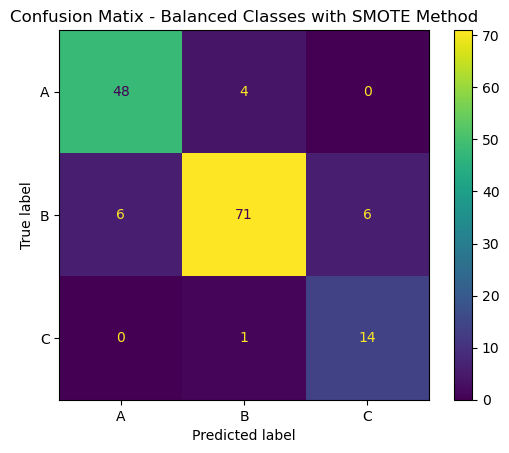

In [42]:
# Create a Confusion Matrix
ConfusionMatrixDisplay.from_predictions(Y_valid, Y_pred)
plt.title("Confusion Matix - Balanced Classes with SMOTE Method")